In [ ]:
# !pip install RISE

## Задачи регрессии и классификации

## Постановка задачи машинного обучения

$X \space-$  множество объектов

$Y \space-$  множество ответов

$y : X → Y \space-$ целевая функция

$X^\ell = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\} \space-$  обучающая выборка

$y_i = y(x_i) \space-$ значение целевой функции на объекте обучающей выборки

$a : X → Y \space-$ алгоритм, решающая функция, приближающая значения целевой функции на множестве X


## Постановка задачи машинного обучения

$f: X → D \space -$ признак объекта (featurе)

$(f_1(x), \ldots , f_n(x)) \space -$ признаковое описание объекта x

$F \space -$  матрица "объекты-признаки": 
$$ F = ||f_j(x_i)||_{ℓ \times n}= 
\begin{pmatrix}
f_1(x_1) &  \ldots & f_n(x_1)\\
\ldots & \ldots & \ldots \\
f_1(x_ℓ) & \ldots & f_n(x_ℓ)
\end{pmatrix}$$


## Типы задач

Перечислим несколько  видов задач обучения с учителем:

  $Y = \mathbb{R} \space -$ задача регрессии 
  
  $Y = \{0, 1\} \space -$ бинарная классификация
   
  $Y = \{1, \dots, K\} \space -$ многоклассовая (multi-class) классификация
  
  $Y = \{0, 1\}^K \space -$ многоклассовая классификация с пересекающимися классами (multi-label classification)

## Модель алгоритма и метод обучения

<b>Модель алгоритма</b> $-$ параметрическое семество функций  $A = \{a(x, \theta) | \theta \in \Theta \}$

где  $a(x, \theta): X → Y \space -$ конкретный алгоритм, $\Theta \space - $ пространство параметров.

Линейная модель c вектором параметров $\theta = (\theta_0, \theta_1, \ldots, \theta_n ) \in \mathbb R^n$:


$ A_{linear} = \{ \sum_{i=1}^{n}\theta_i x_i | \theta \in \mathbb R^n\} \space -$ для задачи регрессии

$ A_{linear} = \{ sign \sum_{i=1}^{n}\theta_i x_i | \theta \in \mathbb R^n\} \space -$ для задачи классификации



<b>Метод обучения</b> $\mu: (X \times Y)^\ell → A$  по выборке $X ^ \ell$ строит алгоритм $a= \mu(X^\ell)$ 

## Функция потерь и функционал качества 

<b>Функция потерь (loss function)</b> $L(a(x), y) \space -$ величина ошибки алгоритма $a \in A$ на объекте $x \in X$ 


Фунция потерь для задачи классификации: 

$L(a(x),y) = [a(x) \ne y] \space -$ индикаторная функция ошибки 


Функции потерь для задачи регрессии:

$L(a(x),y) = |a(x) - y| \space -$ абсолютное значение ошибки

$L(a(x),y) = (a(x) - y)^2 \space -$ квадратичная функция ошибки


<b>Эмпирический риск</b> $-$ функционал качества алгоритма a на обучающей выборке $X^\ell$:

$$Q(a, X^{\ell}) = \frac{1}{\ell} \sum_{i=1}^{\ell} L(a(x_i),y_i)$$


## Сведение задачи машинного обучения к задаче оптимизации

<b>Метод минимизации эмпирического риска</b>:

$$a= \mu(X^\ell) = \operatorname*{argmin}_{a \in A} Q(a, X^{\ell})$$

<b>Пример, задача регрессии:</b> целевая переменная $Y \in \mathbb R$, обучающая выборка  $X^{\ell}$

Линейную модель алгоритма: $a(x, \theta) = \sum_{j=1}^n \theta_j f_j(x), \space \theta \in \mathbb R^n$

Функция потерь: $L(a(x),y) = (a(x) - y)^2$

Метод наименьших квадратов - частный случай минимизации эмпирического риска:

$$a = \mu(X^\ell) =  \operatorname*{argmin}_{\theta \in \Theta} \sum_{i=1}^{\ell} (a(x_i, \theta) - y_i)^2$$


## Проблема переобучения и обобщающая способность.

Целевая функция $y(x) = \frac{1}{1+25x^2}$ с область определения [0,2].

Обучающая выборка $X^{\ell}$ - 40 случайных точек из области определения функции полученных с помощью случайной функции $\tilde{y}_i = y(x_i) + \mathcal{N}(0, 0.01)$.

In [8]:
def plot_target(X, Y, X_l, Y_l):
    plt.plot(X, Y, label="Real function",)
    plt.scatter(X_l, Y_l, label="Training sample")
    ax = plt.gca()
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    ax.set_ylim(-0.2, 1.2)
    ax.legend()

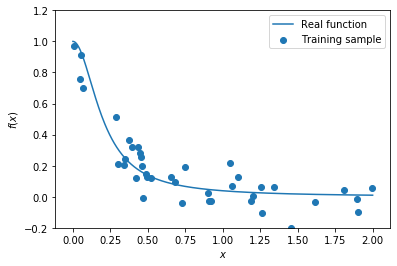

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(36)
X = np.linspace(0, 2, 500).reshape((-1,1))
Y = (1+25*X**2)**-1

X_l = np.random.uniform(0, 2, size=40).reshape((-1,1))
Y_l = (1+25*X_l**2)**-1 + np.random.normal(scale=0.1, size=X_l.shape)

plot_target(X, Y, X_l, Y_l)

In [10]:
def plot(i, X, Y, X_l, Y_l, Y_pred): 
    axs[i].plot(X, Y, label="Target function")
    axs[i].scatter(X_l, Y_l, label="Training sample")
    axs[i].plot(X, Y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-0.2, 1.2)

## Проблема переобучения и обобщающая способность.

Попытаемся обучить три разных линейных модели: признаки для первой &mdash;  $\{x^0, x\}$, для второй &mdash; $\{x^0, x, x^2, x^3, x^4\}$, для третьей &mdash; $\{x^0, \dots, x^{20}\}$.

Линейная модель алгоритма: 
$$a(x,\theta) = \theta_0 + \theta_1 x + \theta_1 x^2 + \dots + \theta_n x^n$$

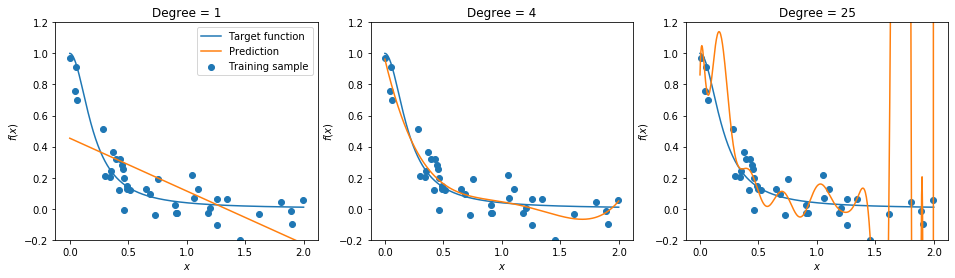

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 25]):
    pf = PolynomialFeatures(degree)
    pf.fit(X_l)
    
    model = LinearRegression()
    model.fit(pf.transform(X_l), Y_l)
    
    Y_pred = model.predict(pf.transform(X))
    
    plot(i, X, Y, X_l, Y_l, Y_pred)

## Проблема переобучения и обобщающая способность.

In [12]:
def plot_fitting():
    train_errors, test_errors = [], []
    degrees = np.arange(1, 12)
    
    for i, degree in enumerate(degrees):
        pf = PolynomialFeatures(degree)
        pf.fit(X_l)

        X_train = X_l[:20]
        Y_train = Y_l[:20]

        X_test = X_l[20:]
        Y_test = Y_l[20:]

        model = LinearRegression()
        model.fit(pf.transform(X_train), Y_train)

        Y_train_pr = model.predict(pf.transform(X_train))
        Y_test_pr = model.predict(pf.transform(X_test))

        def loss(y_true, y_pred):
            return np.mean((y_true-y_pred)**2)

        train_errors.append(loss(Y_train,Y_train_pr))
        test_errors.append(loss(Y_test, Y_test_pr))
    plt.figure(figsize=(10, 5))
    plt.plot(degrees, train_errors, label="train errors",)
    plt.plot(degrees, test_errors, label="test errors")
    ax = plt.gca()
    ax.set_xlabel("$number\ of\ parameters$")
    ax.set_ylabel("$error$")
    ax.legend()


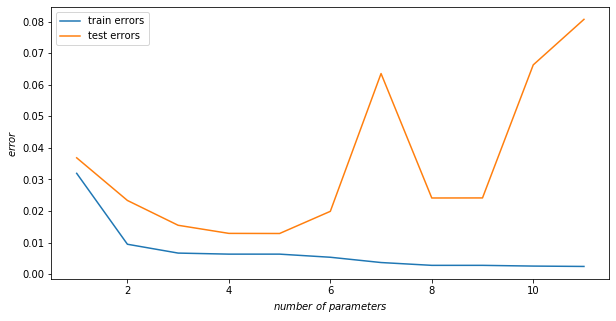

In [13]:
plot_fitting()

<b>Недообучение</b> - модель слишком проста, недостаточное количество параметров $\theta$.

<b>Переобучение</b> - модель слишком сложна, избыточное количество параметров $\theta$.
Избыточные степени свободы модели расходуются на чрезмерную подгонку под шум в обучающей выборке

Переобучение можно обнаружить эмпирически путем разбеения выборки на train и test. Причем на test'овой выборке нам должны быть известны ответы

## Эмпирические оценки обобщающей способности

<b>Отложенная выборка, hold-out</b>

$$HO(\mu, X^\ell, X^k) = Q(\mu(X^\ell), X^k) → min  $$

<b>Кросс-валидация </b>

$$CV(\mu, X^{\ell+k}) = \frac{1}{|P|} \sum_{p \in P} Q(\mu(X^\ell_p), X^k_p) → min$$

## Классификация 

Обучающая выборка: $X^\ell= (x_i, y_i)_{i=1}^\ell, x_i \in \mathbb R^n, y_i \in \{-1, +1 \}$

Линейная модель классификации: $a(x, \theta) = sign \langle x, \theta \rangle $

Функция потерь - бинарная или ее аппроксимация:
$L(a(x),y) = [a(x)y < 0]=[ \langle x, \theta  \rangle y < 0] \le L(\langle x,w \rangle y)$

Метод обучения:
$$Q(\theta) = \sum_{i=1}^\ell [\langle x, \theta  \rangle y < 0] \le \sum_{i=1}^\ell L(\langle x, \theta \rangle y) → \operatorname*{min}_\theta$$

In [14]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=1.4, random_state=0)
clf = SGDClassifier(max_iter=1000, tol=1e-6)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=1e-06,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
x_hyperplane = np.arange(-2, 6)
y_hyperplane = (clf.coef_[0][0]*x_hyperplane + clf.intercept_[0])/-clf.coef_[0][1]

In [19]:
margin = np.sort((X.dot(clf.coef_[0]) + clf.intercept_[0])*(2*y-1))
n = list(range(len(margin)))

## Понятие отступа 

Линейноая модель классификации: $a(x, \theta) = sign \langle x, \theta \rangle $

Уравнение разделяющей поверхности: $\langle x, \theta \rangle = 0$ 

Отступ $M(x_i) = \langle x_i, \theta \rangle y_i$  объекта $x_i$

Если $M(x_i) < 0$ то алгорит классификации ошибается на объекте $x_i$



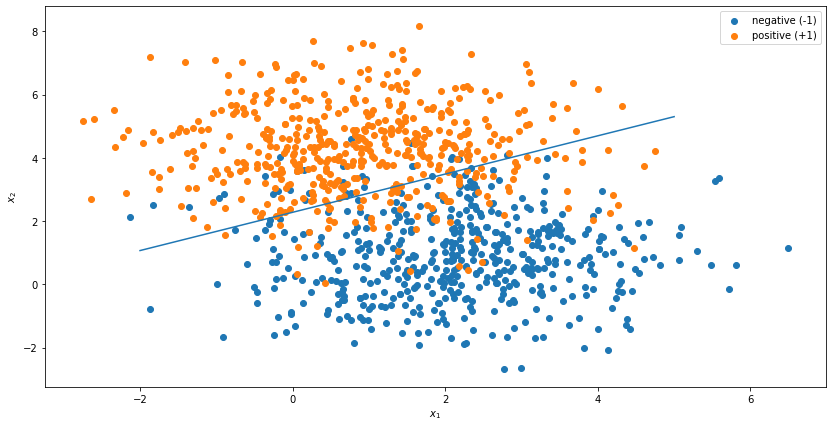

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(x_hyperplane, y_hyperplane)
plt.scatter(X[y.astype(bool), 0], X[y.astype(bool), 1], label="negative (-1)")
plt.scatter(X[~y.astype(bool), 0], X[~y.astype(bool), 1], label="positive (+1)")
ax = plt.gca()
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

## Сортировка объектов по возрастанию величины зазора

No handles with labels found to put in legend.


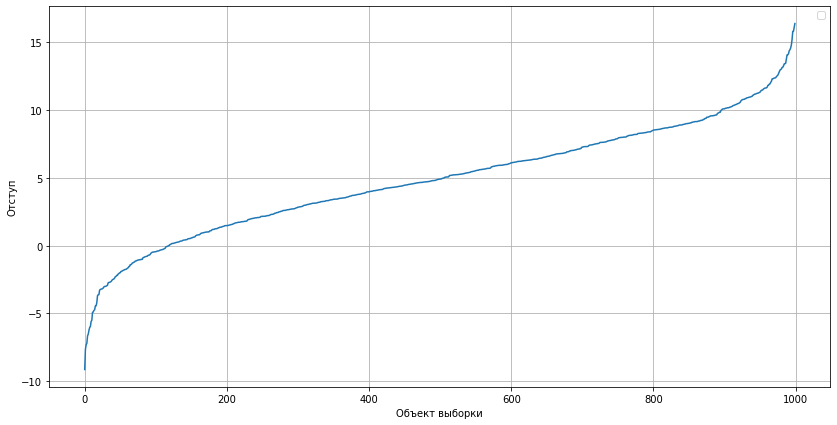

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(n, margin)
ax = plt.gca()
ax.set_xlabel("Объект выборки")
ax.set_ylabel("Отступ")
ax.grid()
ax.legend()

In [22]:
m = np.arange(-5, 5, 0.001)

In [23]:
v = np.where(1-m > 0, 1-m, 0)
h = np.where(-m > 0, -m, 0)
l = np.log2(1 + np.e**(-m)) 
q = (1 - m)**2  
s = 2*(1 + np.e**m)**-1
p = np.where(m <= 0, 1, 0)

## Непрерывные аппроксимации пороговой функции потерь


|  ||  ||  ||  |
|----------||----------||----------||----------|
|$V(M) = (1-M)_+ $ || кусочно-линейная SVM  || $H(M) = (-M)_+ $ || кусочно-линейная Hebb|
|$L(M) = log_2(1 + e^{-M})$ ||логарифмическая ||  $Q(M) = (1-M)^2 $|| квадратичная |
|$P(M) = [M < 0]$ || пороговая || $S(M) = \frac{2}{1 + e^M}$ || сигмоидная|    
         

In [55]:
def plot_lf():
    plt.figure(figsize=(14, 7))
    plt.plot(m, v,  label="Кусочно-линейная SVM")
    plt.plot(m, h,  label="Кусочно-линейная Hebb")
    plt.plot(m, l,  label="Логистическая")
    plt.plot(m, q,  label="Квадратичная")
    plt.plot(m, s,  label="Сигмоидная")
    plt.plot(m, p,  label="Пороговая")
    ax = plt.gca()
    ax.set_xlabel("Margin")
    ax.set_ylabel("Loss(Margin)")
    ax.set_ylim(0, 5)
    ax.grid()
    ax.legend()

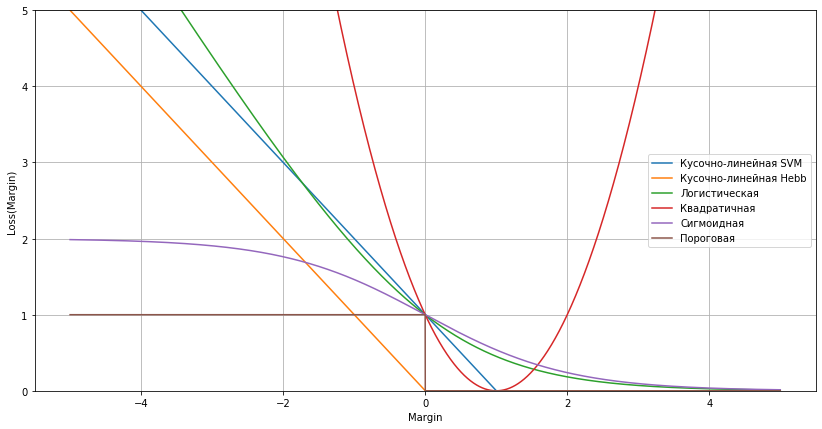

In [56]:
plot_lf()

## Градиентный метод численной оптимизации

$$Q(\theta) = \frac{1}{\ell} \sum_{i=1}^{\ell} L(a(x_i, \theta),y_i) → \operatorname*{min}_\theta$$

$$\theta^{0} :=  \space начальное \space приближение  $$


$$\theta^{t+1} :=  \theta^t - h \cdot \nabla Q(\theta^t) \space  $$

$$ \nabla Q(\theta) = \lgroup \frac{\partial Q(\theta)}{\partial \theta_j} \rgroup \lvert^n_{j=1}  \space  $$

$$\theta^{t+1} :=  \theta^t - h \cdot \sum_{i=1}^{\ell} \nabla L(a(x_i, \theta^t),y_i) \space  $$

<b>Идея ускорения сходимости:</b> брать $(x_i, y_i)$ по одному и сразу обновлять вектор весов

## Алгоритм SGD (Stochastic Gradient Descent)

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$, темп забывания $\lambda$

<b>Выход: </b> вектор весов $\theta$, 

1.  Инициализировать веса $\theta_j$, $j=0,\dots n$
2.  Инициализировать оценку функционала качества: $Q := \frac{1}{\ell} \sum_{i=1}^{\ell} L(\theta)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом объект ${x_i}$ из $X^{\ell}$
    
    Вычислить потерю: $\varepsilon_i := L(x_i, \theta)$
    
    Cделать градиентный шаг: $\theta := \theta - h\cdot \nabla L(x_i, \theta)$
    
    Оценить функционал: $Q$ := $\lambda \varepsilon_i + (1 - \lambda)Q$
    
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся     








## Рекурсивная оценка функционала качества

Проблема: вычисление оценки $Q$ по всей выборке $X^\ell$ намного дольше градиентного шага по одному объекту $x_i$

Решение: использовать приближенную рекурентную формулу (онлайн алгоритм рассчета функционала качества)

Среднее арифметическое: 

$$ Q_m = \frac{1}{m}{\varepsilon_m} + \frac{1}{m}{\varepsilon_{m-1}} +  \frac{1}{m}{\varepsilon_{m-2}} + \dots + \frac{1}{m}{\varepsilon_0}  $$

$$ Q_m = \frac {\sum_{i=1}^{m-1}\varepsilon_i +  \varepsilon_m} {m} = 
   \frac {\sum_{i=1}^{m-1}\varepsilon_i \cdot(m-1)}{(m-1)\cdot m} +  \frac{\varepsilon_m} {m} = (1- \frac{1}{m}) Q_{m-1}+ \frac{1}{m} \cdot \varepsilon_m$$
   
Экспоненциальное скользящее среднее: 

$$ Q_m = \lambda{\varepsilon_m} + (1-\lambda)\lambda \varepsilon_{m-1} + (1-\lambda)^2 \lambda \varepsilon_{m-2} + \dots $$
$$ Q_m = \lambda{\varepsilon_m} + (1-\lambda) Q_{m-1}  $$

$\lambda$ - темп забывания предыстории ряда

## Метод накопления инерции (momentum SGD)


<b>Momentum </b> - экспоненциальное скользящее среднее градиента по последним $~ \frac{1} {1-\gamma}$ итерациям

$$v := \gamma v + (1- \gamma) \nabla L(x_i, \theta)$$

$$\theta = \theta - h\cdot v$$


<b>NAG (Nesterov's acclecerated gradient)  </b>

$$v := \gamma v + (1- \gamma) \nabla L(x_i, \theta - h\gamma v)$$

$$\theta = \theta - h\cdot v$$


<b>AdaGrad (Adaptive gradient)</b>


$$g = g + (\nabla L(\theta))^2 $$
$$\theta = \theta - \frac{\eta}{\sqrt{g + \varepsilon}} \nabla L(\theta)$$


<b>RMSprop (Root Mean Square Propagation)</b>


$$g = \gamma g + (1-\gamma)(\nabla L(\theta))^2 $$
$$\theta = \theta - \frac{\eta}{\sqrt{g + \varepsilon}} \nabla L(\theta)$$






## Варианты инициализации весов 

1. Нулевой вектор весов $\theta$

2. Небольшие случайные значения 

3. Коэффициенты корреляции Пирсона с целевой переменной $\theta_i = corr(f_i, y)$ (для регрессии)

## Варианты порядка предъявления объектов 

1. Попеременно брать объекты из разных классов 

2. Чаще брать объекты, на которых ошибка больше:

   Чем меньше $M_i$, тем больше вероятнсть взять объект
   
3. Чаще брать объекты. на которых уверенность меньше:

    Чем меньше $|M_i|$, тем больше вероятность взять объект
    
4. Не брать хорошие объекты  и объекты выборсы:

    $|M_i| > \mu$ - небрать

## Проблема переобучения

<b>Возможные причины переобучения: </b>

 *  слишком маленькая выборка 
 *  слишком много признаков 
 *  линейная зависимость признаков: неединственность решения оптимизационной задачи
 
<b>Проявление переобучения: </b> 

 * слишком большие по модулю веса разных знаков 
 * $Q(X^{\ell}) << Q(X^{k})$    
 
<b>Основной способ уменьшить переобучение: </b>
  * регуляризация  (сокращение весов, weigth decay)

## Регуляризация

Штраф за увеличение нормы вектора весов:

$$\widehat{Q} := \frac{1}{\ell} \sum_{i=1}^{\ell} L(a(x_i,\theta), y_i) + \alpha L(\theta)  → \operatorname*{min}_\theta$$


$$   L_2(w) = \|w\|_2 = \sum_{i = 1}^d w_i^2$$
$$   L_1(w) = \|w\|_1 = \sum_{i = 1}^d |w_i|$$ 


Метод подбора коэффициента регуляризации $alpha$ - кросс-валидация

In [26]:
def plot_lasso():
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import linear_model
    from sklearn import datasets

    X, y = datasets.load_diabetes(return_X_y=True)

    _, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= -xx[-1] 
    
    plt.figure(figsize=(14, 7))

    plt.plot(xx + 1, coefs.T)
    ymin, ymax = plt.ylim()
    # plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('$coeff$')
    plt.ylabel('weigths')
    plt.title('$L_1$ path')
    plt.axis('tight')
    plt.show()

## $L-1$ регуляризация

.

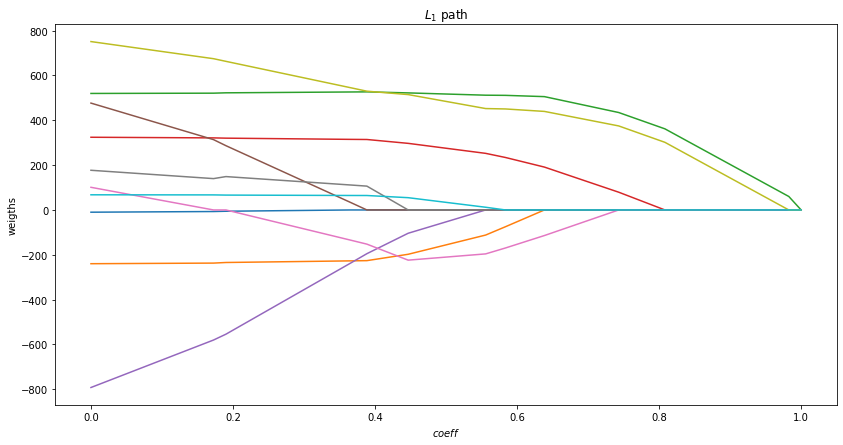

In [27]:
plot_lasso()

## Принцип максимума правдоподобия 

Задача классификации: $ X \in \mathbb R^n$, $Y  \in \{-1, +1\}$ф

Априорные вероятностные предположения:

Пусть $X \times Y$ - вероятностное пространство с плотностью  $p(x,y|\theta)=P(y|x,\theta)p(x)$

Пусть $X^\ell$ - простая (i.i.d.) выборка: $(x_i, y_i)_{i=1}^{\ell}  \sim  p(x,y|\theta)$

Функция правдоподобия выборки - совместное распределение выборки:

$$p(X^\ell) =  \overset{\ell} {\underset{i=1}{П}} p(x_i, y_i|\theta) = \overset{\ell} {\underset{i=1}{П}} P(y_i| x_i, \theta)p(x_i) → \operatorname*{max}_\theta$$

$$\overset{\ell} {\underset{i=1}{П}} P(y_i| x_i, \theta) → \operatorname*{max}_\theta$$


Максимизация логарифма правдоподобия (Maximum Likelihood, ML) 

$$ln \space p(X^\ell) =  \overset{\ell} {\underset{i=1}{\sum}} log P(y_i| x_i, \theta) → \operatorname*{max}_\theta$$

   

## Связь правдоподобия и эмпирического риска


Максимизация логарифма правдоподобия (Maximum Likelihood, ML) 

$$ln \space  p(X^\ell|\theta) =  \overset{\ell} {\underset{i=1}{\sum}} ln \space P(y_i| x_i, \theta) → \operatorname*{max}_\theta$$

Минимизация аппроксимированного эмпирического риска:

 $$ Q(X^\ell|\theta) =  \overset{\ell} {\underset{i=1}{\sum}} L(y_i a(x_i, \theta)) → \operatorname*{min}_\theta$$
 
Эти два принципа эквивалентны, если предположить, что:

$$-ln \space  P(y_i| x_i, \theta) = L(y_i a(x_i, \theta)) $$

Задание вероятностной модели $P(y_i| x_i, \theta)$ эквивалентно заданию модели алгоритма $a(x,\theta)$ и функции потерь $L(M)$

## Логистическая регрессия
Логистическая регрессия для двухклассовой классификации $Y  \in \{-1, +1\}$

<b>Минимизация эмпирического риска </b>:

Задаемся функцией потерь: логистическая функция потерь 
$$L(M) = log(1 + e^{-M})$$ 
$$M = y\langle x, \theta  \rangle$$


<b>Модель условной вероятности</b>:

$$P(y_i| x_i, \theta) = \sigma(M) = \frac{1}{1 + e^{-M}}$$

$$\sigma(M) + \sigma(-M) = 1$$
<b>Условие эквивалентности оптимизационных задач :</b>

$$-log P(y_i| x_i, \theta) = L(y_i a(x_i, \theta)) $$

In [57]:
def plot_log():
    plt.figure(figsize=(14, 7))
    plt.plot(m, l,  label="Логистическая")
    plt.plot(m, p,  label="Пороговая")
    ax = plt.gca()
    ax.set_xlabel("Margin")
    ax.set_ylabel("Loss(Margin)")
    ax.set_ylim(0, 3)
    ax.grid()
    ax.legend()

## Логистическая функция потерь

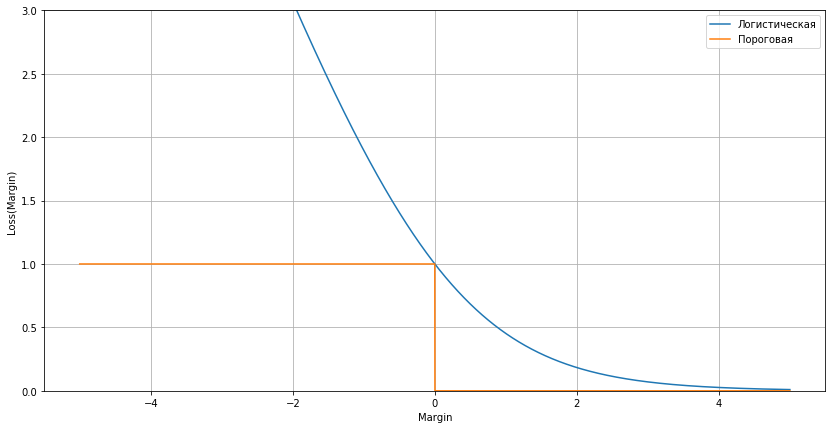

In [58]:
plot_log()

## Модель условной вероятности. Сигмоида

In [46]:
def plot_sigmoid():
    plt.figure(figsize=(14, 7))
    plt.plot(m, 1/( 1 + np.e**-m),  label="P(y|x,w$)")
    ax = plt.gca()
    ax.set_xlabel("Margin")
    ax.set_ylabel("P(y=1|x,w)")
    ax.set_ylim(0, 1.2)
    ax.grid()
    ax.legend()

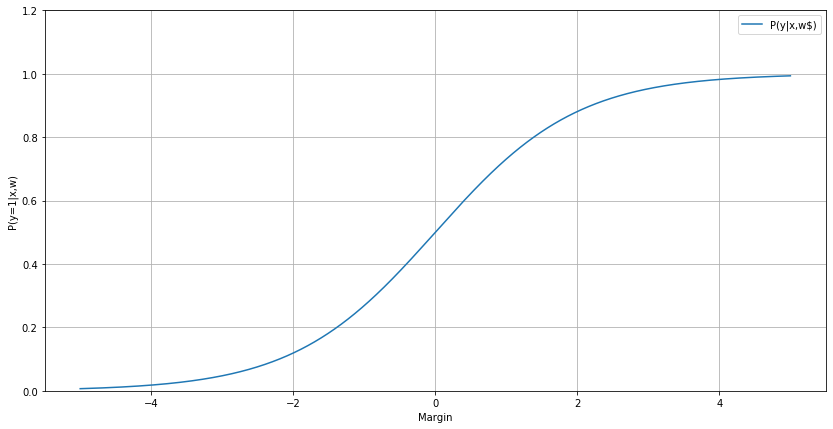

In [47]:
plot_sigmoid()

## Вероятностный смысл регуляризации

$P(y| x, \theta) $ - вероятностная модель 
$p(\theta; \gamma)$ - априорное распределение параметров модели 

Теперь не только пространство объектов-ответов но и веса модели - стохастические. 

Совместное правдоподобие данных и модели:

$$p(X^\ell, \theta) = p(X^\ell|\theta)p(w;\gamma)$$

Принцип максимума апостериорной вероятности: 

$$ln \space  p(X^\ell, \theta) =  \overset{\ell} {\underset{i=1}{\sum}} ln \space P(y_i| x_i, \theta) + ln \space p(\theta; \gamma) → \operatorname*{max}_\theta$$


## Априорные распределения Гаусса и Лапласа

Пусть все веса $\theta$ независимы и $E\theta = 0$ и $D\theta_i = \gamma^2 $

т.к. веса независимы плотность многомерного распределения представимо в виде  призведения безусловных распрдеделний компонентов вектора весов

Распределение Гаусса и $l_2$ регуляризатор

$$ln \space p(\theta; \gamma)  =  ln \overset{n} {\underset{i=1}{П}} p(\theta_i; \gamma) =  \overset{n} {\underset{i=1}{П}} ln \frac{1}{\sqrt{2\pi} \gamma}exp(-\frac{\theta_i^2}{2\gamma^2}) = const_1 + \frac{1}{2\gamma^2} \overset{n} {\underset{i=1}{\sum \theta_i^2}} $$



Распределение Лапласа и $L_1$ регуляризатор

$$ln \space p(\theta; \gamma)  =  ln \overset{n} {\underset{i=1}{П}} p(\theta_i; \gamma) = \overset{n} {\underset{i=1}{П}} ln \frac{1}{\sqrt{2 \gamma}}exp(-\frac{|\theta_i|}{\gamma}) = const_1 + \frac{1}{\gamma} \overset{n} {\underset{i=1}{\sum |\theta_i|}} $$

## Заключение 

Постановка задачи машинного обучения

Сведение задачи машинного обучения к задаче оптимизации 

Методы оптимизации 

Проблема переобучения и обобщающая способность

Регуляризацию и ее вероятностный смысл

Задачи классификации и понятие отступа

Логистическую регрессию 




## Курсы лекций и материалы

[Машинное обучение. К.В. Воронцов](http://www.machinelearning.ru/wiki/index.php?title=Машинное_обучение_(курс_лекций,_К.В.Воронцов))

[Машинное обучение. Е.А. Соколов](https://youtube.com/playlist?list=PLEqoHzpnmTfDwuwrFHWVHdr1-qJsfqCUX)

[Анализ малых данных. А.Г. Дьяконов](https://dyakonov.org)

[Логистическая регрессия. А.Г. Дьяконов](https://dyakonov.org/2018/03/12/логистическая-функция-ошибки/) 


[Байесовские методы в машинном обучении. Д.П. Ветров](https://www.youtube.com/playlist?list=PLEqoHzpnmTfCiJpMPccTWXD9DB4ERQkyw)

[Методы оптимизации. А.М. Катруца](https://www.youtube.com/playlist?list=PL4_hYwCyhAvYPakWYKKt3RnTAFiTewm50)

[Теоретический минимум по методам оптимизации. Д.М. Меркулов](https://www.youtube.com/watch?v=mFG5R-7MvU0)



## Принцип максимума правдоподобия для регрессионной задачи

Регрессионная задача, априорные предположения:
     $$y = \langle x, \theta \rangle + \varepsilon$$
     $$\varepsilon \sim N(0, \sigma^2) $$
     
Функция правдоподобия выборки - совместное распределение выборки:

$$p(X^\ell) =  \overset{\ell} {\underset{i=1}{П}} p(\varepsilon_i|\theta) = \overset{\ell} {\underset{i=1}{П}} \frac{1}{\sqrt{2\pi}\sigma}exp(\frac{(y_i-\langle x_i\theta\rangle)^2}{\sigma^2}) → \operatorname*{max}_\theta$$

$$log\overset{\ell} {\underset{i=1}{П}} exp(\frac{(y_i-\langle x_i\theta\rangle)^2}{\sigma^2}) → \operatorname*{max}_\theta $$

$$\overset{\ell} {\underset{i=1}{\sum}} \frac{(y_i-\langle x_i\theta\rangle)^2}{\sigma^2} → \operatorname*{max}_\theta $$

$$\overset{\ell} {\underset{i=1}{\sum}} (y_i-\langle x_i\theta\rangle)^2 → \operatorname*{max}_\theta $$

Максимизация правдоподобия выборки эквивалетна минимизации эмпирического риска